In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pickle
import numpy as np

In [2]:
# Load the data from a JSON file into a pandas DataFrame
data = pd.read_json('qa.json')

In [3]:
data['score'] = 1

In [4]:
with open("./Im_act.txt",'r',encoding="utf8") as f:
    im_vocab = f.read()

In [5]:
with open("./text_web.txt",'r',encoding="utf8") as f:
    english_vocab = f.read()

In [6]:
with open("./text_news.txt",'r',encoding="utf8") as f:
    news_vocab = f.read()

In [7]:
# Use CountVectorizer to convert the text into a document-term matrix
vectorizer = CountVectorizer()

In [8]:
vectorizer.fit([im_vocab+english_vocab+news_vocab])

CountVectorizer()

In [9]:
answers = list()

In [10]:
scores = []

# Loop over the DataFrame and calculate the cosine similarity for each question-answer pair
for i, row in data.iterrows():
    # Use CountVectorizer to convert the question and answer text into a document-term matrix
    qn_matrix = vectorizer.transform([row['qn']])
    ans_matrix = vectorizer.transform([row['ans']])
    answers.append(ans_matrix)
    # Calculate the cosine similarity between the question and answer
    cos_sim = cosine_similarity(qn_matrix, ans_matrix)
    scores.append(cos_sim[0][0])

In [11]:
data['score'] = scores

In [12]:
data['score'].mean()

0.2638849280538541

In [13]:
data['score'].std()

0.14606203031936027

<Axes: ylabel='Frequency'>

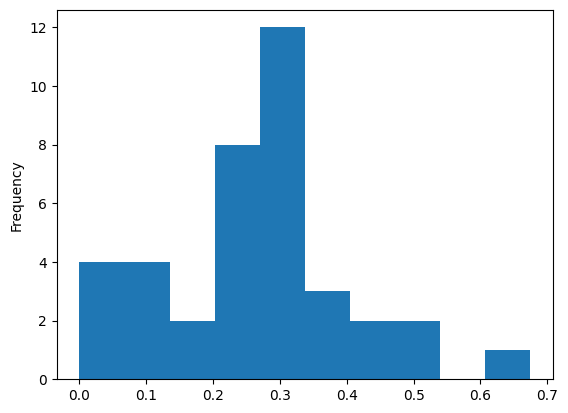

In [14]:
data['score'].plot(kind='hist')

In [15]:
data['score'].mean() - data['score'].std()

0.11782289773449384

In [16]:
# Save the vectorizer as a pickle file
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)

In [17]:
np.save("answers.npy",answers)